# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [141]:
! git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def pn(x, y = '\n'):
  print(x, y)


#making this to streamline plotting columns
def plotbox(df_column):
  plt.figure()
  df_column.plot.box()
  plt.show()

def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)


#Code for running a regression based off our class notes:

def runaregression(x_trn, x_tst, y_trn, y_tst):
  reg = LinearRegression().fit(x_trn, y_trn) # Fit the linear model: remember to use TRAINING DATA
  pn(reg.intercept_) # Intercept value
  pn(reg.coef_) # Regression coefficients
  pn("R^2: " + str(reg.score(x_tst, y_tst))) # R squared measure

  # Predicted values:
  y_hat = reg.predict(x_tst)
  residuals_n = y_tst - y_hat
  MSE = mean_squared_error(y_tst, y_hat)
  RMSE = np.sqrt(MSE)
  pn("RMSE: " + str(RMSE))
  pn("MSEL "+ str(MSE))

  ## Residual plot:
  sns.kdeplot(residuals_n).set(title = "Residual Plot")
  plt.show()

  ## True versus predicted plot:
  plt.scatter(x=y_hat,y=y_tst)
  plt.title('Predicted vs. Actual Values')
  plt.show()

def polyexpndregression(X_all_train, X_all_test, y_all_train, y_all_test, dgrees): #note that this specifically is worded to fit the training/te=esting variable names in 5/end of 4 (the joint regression split variable names)
  # Expand features
  expander = PolynomialFeatures(degree=dgrees,include_bias=False) # Create the expander
  #
  Z_train = expander.fit_transform(X_all_train) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
  #
  Z_test = expander.fit_transform(X_all_test) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

  # Fit the model and get the R2 measure:
  reg = LinearRegression().fit(X_train_lm, y_all_train) # Fit the linear model
  print(reg.score(X_test_lm, y_all_test)) # R squared measure

  # Predicted values:
  y_hat_lm = reg.predict(X_test_lm)
  residuals_lm = y_all_test - y_hat_lm

  ## Residual plot:
  sns.kdeplot(residuals_lm)
  plt.show()

  ## True versus predicted plot:
  plt.scatter(x=y_hat_lm,y=y_all_test)
  plt.title('Predicted vs. Actual Values')
  plt.show()

  TSS = np.sum( (y_all_test - y_all_train.mean())**2 )
  N_test = len(y_all_test)

  ## Metrics:
  SSE_lm = np.sum( (y_all_test-y_hat_lm)**2 )
  MSE_lm = SSE_lm/N_test
  RMSE_lm = (SSE_lm/N_test)**(1/2)
  R2_lm = 1 - SSE_lm/TSS
  pn("R^2: " + str(R2_lm))
  pn("RMSE: " + str(RMSE_lm))





   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
--------------------------------

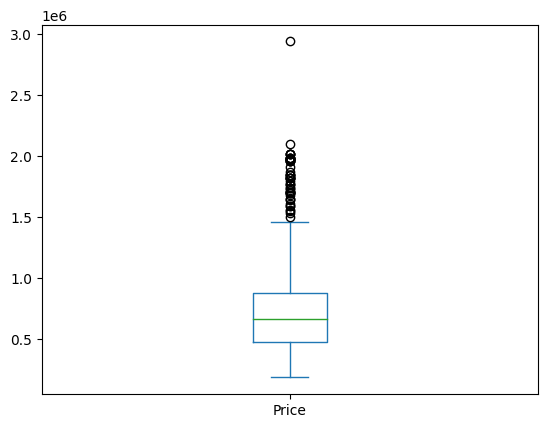

WE SEE THAT THERE ARE MANY OUTLIERS FOR PRICE. LETS TRANSOFRM THE PRICE SO THAT THE OUTLIERS AREN'T SO IMPACTFUL, '
 

Lets see what happens when we arcsin transform price 



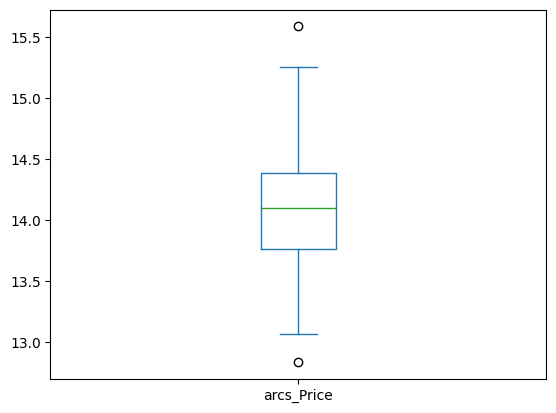

We see that there are only 2 outliers now. Let's windsorize them 



<ipython-input-142-d9156133eacf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-142-d9156133eacf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


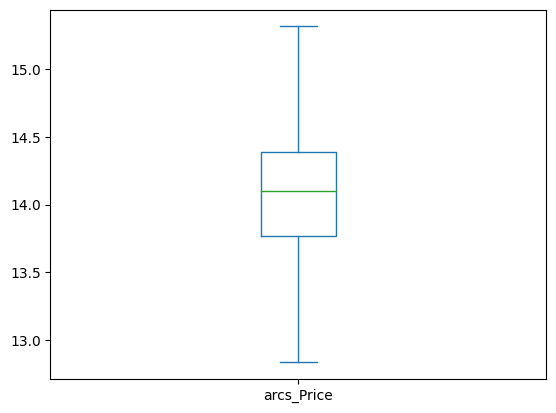

Now I'm gonna do the same thing for milage 



<ipython-input-142-d9156133eacf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-142-d9156133eacf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


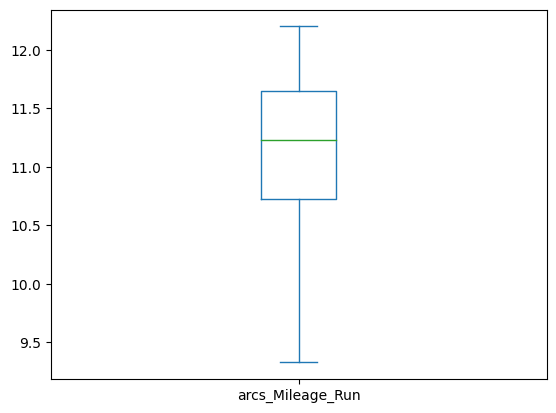

Wee see that there are lots of outliers for arcs_mileage_run. Lets winsdorize 

lets show all the boxplots 



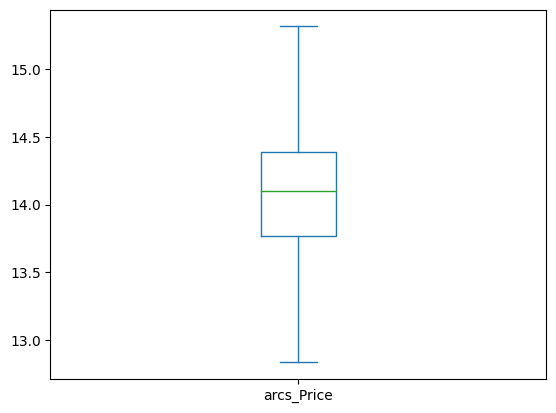

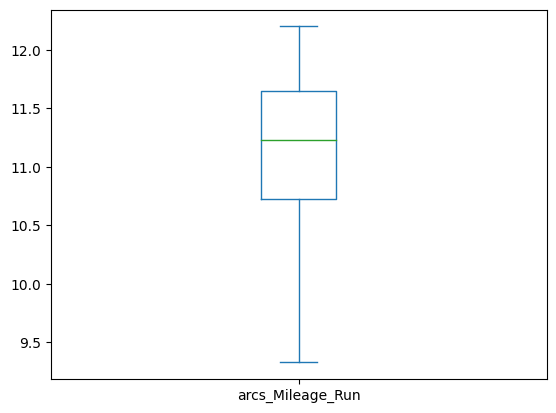

NOW I'LL CREATE A HISTOGRAM TO SHOW THEIR BEHAVIORS 



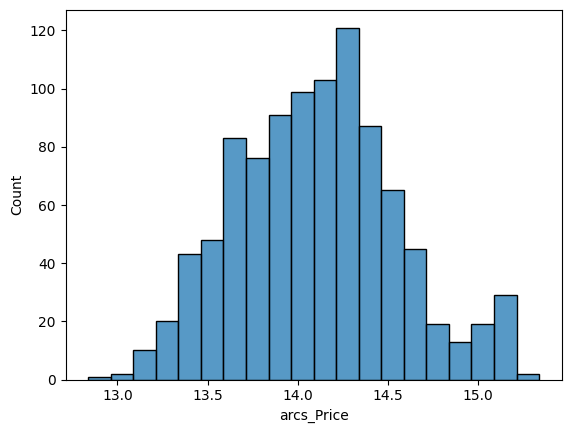

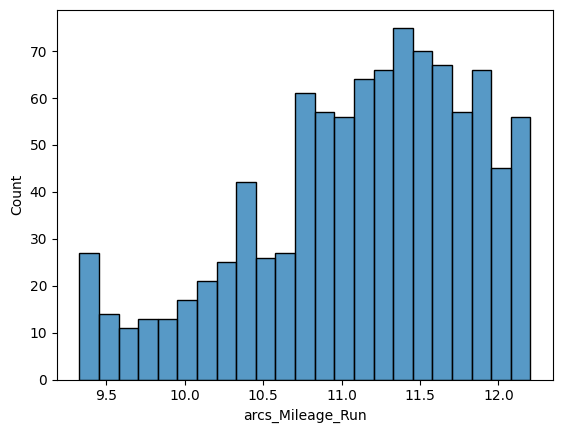

2022
2011
Question 2:------------------------------------------------------------------------------------------ 



In [143]:
carp = pd.read_csv('assignment4/data/cars_hw.csv')
print(carp.head())
#I think that the first column just indexes each observation, which we don't need
indicies = carp.iloc[:, 0]
print("---------------------------------------")


carp1 = carp.drop(carp.columns[0], axis =1)
carp1.head() #good, now we have the dataframe without the indicies

plotbox(carp1["Price"])

pn("WE SEE THAT THERE ARE MANY OUTLIERS FOR PRICE. LETS TRANSOFRM THE PRICE SO THAT THE OUTLIERS AREN'T SO IMPACTFUL, '\n")
pn("Lets see what happens when we arcsin transform price")

carp1["arcs_Price"] = np.arcsinh(carp1["Price"])
plotbox(carp1["arcs_Price"]) #my function
pn("We see that there are only 2 outliers now. Let's windsorize them")

carp1["arcs_Price"] = windsorize(carp1["arcs_Price"])
plotbox(carp1["arcs_Price"])


pn("Now I'm gonna do the same thing for milage")
carp1["arcs_Mileage_Run"] = np.arcsinh(carp1["Mileage_Run"])
carp1["arcs_Mileage_Run"] = windsorize(carp1["arcs_Mileage_Run"])
plotbox(carp1["arcs_Mileage_Run"])

pn("Wee see that there are lots of outliers for arcs_mileage_run. Lets winsdorize")


pn("lets show all the boxplots")
plotbox(carp1["arcs_Price"])
plotbox(carp1["arcs_Mileage_Run"])
pn("NOW I'LL CREATE A HISTOGRAM TO SHOW THEIR BEHAVIORS")

arcP = carp1["arcs_Price"]
arcML = carp1["arcs_Mileage_Run"]

sns.histplot(arcP, binwidth = .125)
plt.show()

sns.histplot(arcML, binwidth = .125)
plt.show()

print(max(carp1["Make_Year"]))
print(min(carp1["Make_Year"]))


pn("Question 2:------------------------------------------------------------------------------------------")



Question 2:----------------------------------------------------------------------------- 

Above is our general kernal density plot for arcsinh of Price. of note, this looks roughly normal 

Here is the grouped data for price by Make: 

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.0888

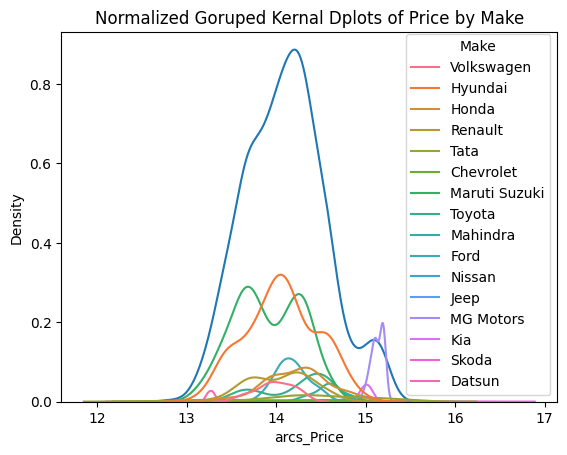

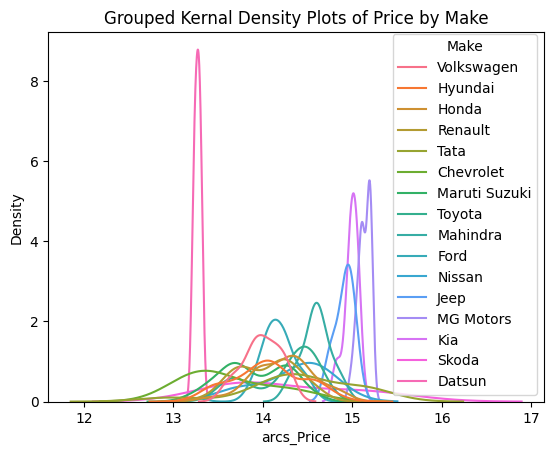

  

Most Brands peaks around arcs_Price = 14 to 14.5 
 MG Motors breaks this trend by peaking after arcs_price = 15. 
 Jeep also has a local maximum (far lower than the absolute max, however) 
 in this same area.
Now lets just look at the means on the table 

               count       mean       std        min        25%        50%  \
Make                                                                         
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Tata            23.0  14.406587  0.614997  12.838145  14.259530  14.368246   
Nissan           4.0  14.334341  0.392610  13.764217  14.230922  14.481870   
Skoda            5.0  14.278905  0.725613  13.678545  13.745088  13.888761   
Honda           73.0  14.229465  0.336

In [144]:
pn("Question 2:-----------------------------------------------------------------------------")

#arcP.describe()

sns.kdeplot(arcP)
pn("Above is our general kernal density plot for arcsinh of Price. of note, this looks roughly normal")

pn("Here is the grouped data for price by Make:")
grouped_price_by_brand = carp1.groupby("Make")["arcs_Price"]
print(grouped_price_by_brand.describe())

sns.kdeplot(data=carp1, x = "arcs_Price", hue = "Make").set(title = "Normalized Goruped Kernal Dplots of Price by Make")
plt.show()

sns.kdeplot(data=carp1, x = "arcs_Price", hue = "Make", common_norm = False) #common_norm is set by default to True. However, it was preventing my from seeing graphically some makes that have distributions centered higher up the price scale
plt.title("Grouped Kernal Density Plots of Price by Make")
plt.show()
pn(" ")
print("Most Brands peaks around arcs_Price = 14 to 14.5",'\n', "MG Motors breaks this trend by peaking after arcs_price = 15.", '\n', "Jeep also has a local maximum (far lower than the absolute max, however)", '\n', "in this same area.")

pn("Now lets just look at the means on the table")
sorted_brand_price_summary = grouped_price_by_brand.describe().sort_values('mean', ascending=False) #sorts the mean from our describe() call in descending order
pn(sorted_brand_price_summary)
pn("The top 3 most expensive brands based of mean are, in order: MG Motors, Kia, Jeep")


In [145]:
pn("Question 3:-------------------------------------------------------------------------------")
y = carp1["arcs_Price"]

X = carp1.drop(['Price', 'arcs_Price', 'Mileage_Run'], axis = 1) #drop the untransformed columns, and also remove our dependentent variable, arcs_price
pn(X.columns) #ok it worked

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Question 3:------------------------------------------------------------------------------- 

Index(['Make', 'Make_Year', 'Color', 'Body_Type', 'No_of_Owners',
       'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type',
       'arcs_Mileage_Run'],
      dtype='object') 



Question 4:------------------------------------------------------------------------------------------ 

I'm gonna make a split again using only numerical variables (columns) 

Index(['Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price', 'arcs_Price', 'arcs_Mileage_Run'],
      dtype='object') 

0      1st
1      1st
2      2nd
3      1st
4      1st
      ... 
971    1st
972    1st
973    1st
974    2nd
975    1st
Name: No_of_Owners, Length: 976, dtype: object 

Index(['Make_Year', 'Seating_Capacity', 'arcs_Mileage_Run'], dtype='object') 

Here is the output for a regression with just the numerical data 

-243.46259224764685 

[0.12641009 0.09664687 0.18914499] 

R^2: 0.34968929015001915 

RMSE: 0.3448653764790938 

MSEL 0.11893212789406711 



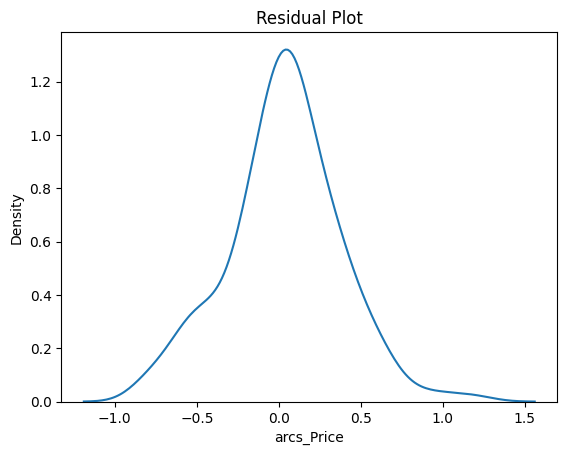

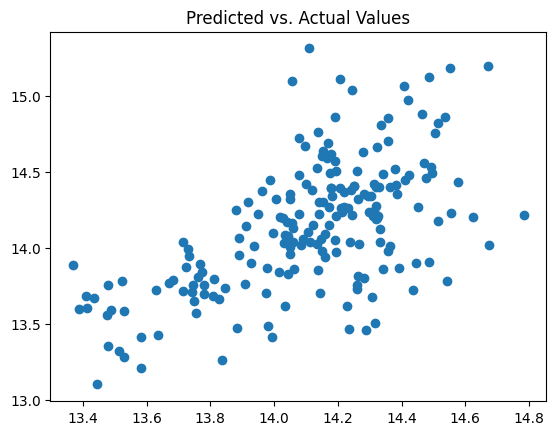

Now lets hot encode 

Here is the regression output for the just the one hot encoded categorical variables 

-88453896965145.4 

[ 5.49548105e+12  5.49548105e+12  5.49548105e+12  5.49548105e+12
  5.49548105e+12  5.49548105e+12  5.49548105e+12  5.49548105e+12
  5.49548105e+12  5.49548105e+12  5.49548105e+12  5.49548105e+12
  5.49548105e+12  5.49548105e+12  5.49548105e+12  5.49548105e+12
  8.94129773e+11  8.94129773e+11  8.94129773e+11  8.94129773e+11
  8.94129773e+11  8.94129773e+11  8.94129773e+11  8.94129773e+11
  8.94129773e+11  8.94129773e+11  8.94129773e+11  8.94129773e+11
  8.94129773e+11  8.94129773e+11  8.94129773e+11 -5.94701222e+12
 -5.94701222e+12 -5.94701222e+12 -5.94701222e+12 -5.94701222e+12
 -4.90394994e+12 -4.90394994e+12 -4.90394994e+12  3.08392713e+12
  3.08392713e+12  3.08392713e+12  3.08392713e+12  3.08392713e+12
  4.30469286e+13  4.30469286e+13  4.67843926e+13  4.67843926e+13
  4.67843926e+13] 

R^2: 0.5896398951969473 

RMSE: 0.27395025400129946 

MSEL 0.0750487416

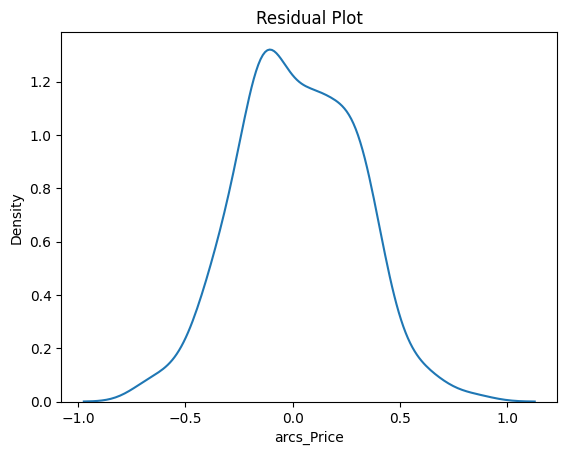

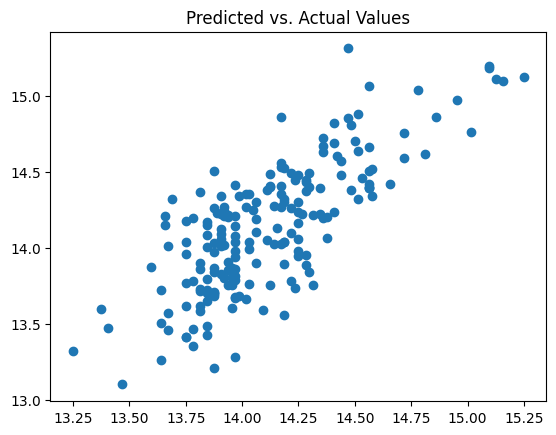

DUE TO HAVING BOTH A LOWER RMSE AND A HIGHER R^2, IT APPEARS THAT THE  HOT-ENCODED REGRESSION FORMORNS BETTER THAN THE PURELY NUMERICAL REGRESSION 

Lets do both combined now by concatinating the two dataframes we created 

-132.78064690045744 

[ 0.07232041  0.15716436  0.01351321 -0.30167094 -0.4483528  -0.10147391
  0.06238795  0.05818895  0.29614291  0.38654212  0.42808977 -0.17202591
 -0.04013472 -0.13174022 -0.20061033  0.02553547 -0.01580078  0.14336547
  0.01155696 -0.08669239  0.00361994  0.04705498 -0.03363057  0.04475312
  0.11366451  0.04263772 -0.01787844  0.05267125  0.06796321 -0.27421375
  0.00134674 -0.00303491  0.00814559  0.03359299  0.0255832  -0.1483004
 -0.26745247  0.14268222  0.24748745  0.15077237 -0.05221425 -0.09855811
 -0.15901157 -0.05683102  0.04929136  0.13955919  0.02699203  0.04374692
 -0.04374692  0.12011461  0.06891866 -0.18903327] 

R^2: 0.8057548775146425 

RMSE: 0.18847953542127216 

MSEL 0.03552453527261858 



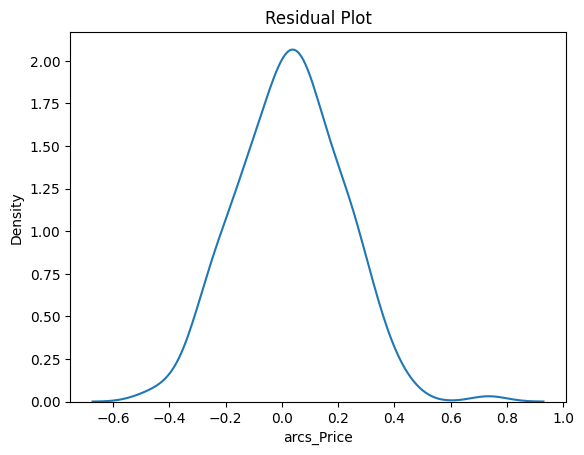

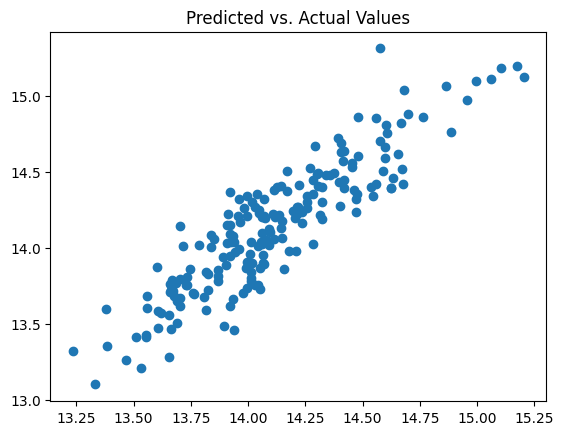

THE REGRESSION OF BOTH THE NUMERICAL AND THE HOT-ENCODED VARIABLES ON PRICE YIELDED THE HIGHEST R^2 AND LOWEST RMSE 

THIS INDICATES THAT OUR JOINT MODEL PERFORMS BEST OF THE 3 WE CREATED 



In [146]:
pn("Question 4:------------------------------------------------------------------------------------------")
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


pn("I'm gonna make a split again using only numerical variables (columns)")
pn(carp1.columns)
yn = carp1["arcs_Price"] #dependent
Xn = carp1.drop(["Price", "arcs_Price", "Make", "Color", "Body_Type", "Mileage_Run", "Fuel_Type", "Transmission", "Transmission_Type", "No_of_Owners"], axis = 1) #only numerical independent variables

pn(carp1["No_of_Owners"]) #indeed, this is categorical. I could also make this numerical if I wanted, but not for now.

pn(Xn.columns)

pn("Here is the output for a regression with just the numerical data")
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=50)
runaregression(Xn_train, Xn_test, yn_train, yn_test) #function we made using class notes at the start of thise assignment


pn("Now lets hot encode")

#categorical columns
cat_columns = ["Make", "Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type", "No_of_Owners"]

#one-hot encoding step
dcat_carp1 = pd.get_dummies(carp1[cat_columns])

dcat_carp1.head()

X = pd.concat([Xn, dcat_carp1], axis=1) #bring in the hot-encoded step

pn("Here is the regression output for the just the one hot encoded categorical variables")

X_train, X_test, y_train, y_test = train_test_split(dcat_carp1, yn, test_size=0.2, random_state=50)
runaregression(X_train, X_test, y_train, y_test)


pn("DUE TO HAVING BOTH A LOWER RMSE AND A HIGHER R^2, IT APPEARS THAT THE  HOT-ENCODED REGRESSION FORMORNS BETTER THAN THE PURELY NUMERICAL REGRESSION")

pn("Lets do both combined now by concatinating the two dataframes we created")

X_all = pd.concat([Xn, dcat_carp1], axis=1)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, yn, test_size=0.2, random_state=50)
runaregression(X_all_train, X_all_test, y_all_train, y_all_test)

pn("THE REGRESSION OF BOTH THE NUMERICAL AND THE HOT-ENCODED VARIABLES ON PRICE YIELDED THE HIGHEST R^2 AND LOWEST RMSE")
pn("THIS INDICATES THAT OUR JOINT MODEL PERFORMS BEST OF THE 3 WE CREATED")




In [147]:
# 5:--------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures
y=carp1['Price'] # target variable
numbers =carp1[['Make_Year', 'Mileage_Run', 'Seating_Capacity']] # set of numerical variables
categories =pd.get_dummies(carp1[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']],dtype='int') # set of one-hot encoded categorical variables
df=pd.concat([numbers, categories],axis=1) #dataframe that contains both, did this in 4 already but redoing just to be sure
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
expander = PolynomialFeatures(degree=2,include_bias=False)
#from notes, creating an expander

Z_train = expander.fit_transform(X_train)
Z_test = expander.transform(X_test)

model = LinearRegression().fit(Z_train, y_train)

y_pred = model.predict(Z_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("r2 at 2 degrees:", r2)

print("rmse at 2 degrees:", rmse)


pn("To be honest, the output looks rediculous. The only thing I can acertain, if my results are even close to correct, is that our model has become wildly overfit")

r2 at 2 degrees: -53404.94915892822
rmse at 2 degrees: 6125421111713600.0
To be honest, the output looks rediculous. The only thing I can acertain, if my results are even close to correct, is that our model has become wildly overfit 



Tis was completed in question 4. Teh R62 was about 0.8 and the RMSE was about 0.18. The predicted and true values do line up in an identifiable generally diagonal shape. 

Here is it again 

-132.78064690045744 

[ 0.07232041  0.15716436  0.01351321 -0.30167094 -0.4483528  -0.10147391
  0.06238795  0.05818895  0.29614291  0.38654212  0.42808977 -0.17202591
 -0.04013472 -0.13174022 -0.20061033  0.02553547 -0.01580078  0.14336547
  0.01155696 -0.08669239  0.00361994  0.04705498 -0.03363057  0.04475312
  0.11366451  0.04263772 -0.01787844  0.05267125  0.06796321 -0.27421375
  0.00134674 -0.00303491  0.00814559  0.03359299  0.0255832  -0.1483004
 -0.26745247  0.14268222  0.24748745  0.15077237 -0.05221425 -0.09855811
 -0.15901157 -0.05683102  0.04929136  0.13955919  0.02699203  0.04374692
 -0.04374692  0.12011461  0.06891866 -0.18903327] 

R^2: 0.8057548775146425 

RMSE: 0.18847953542127216 

MSEL 0.03552453527261858 



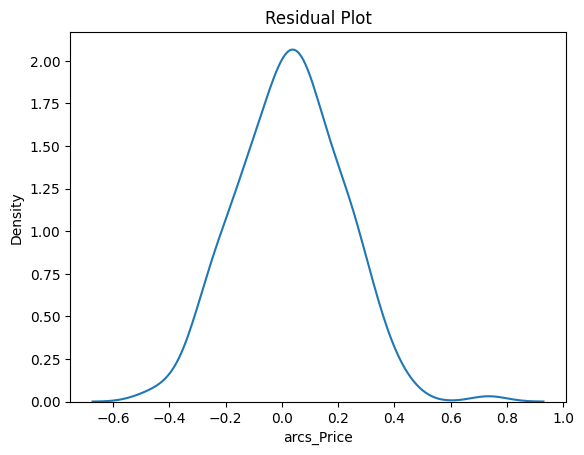

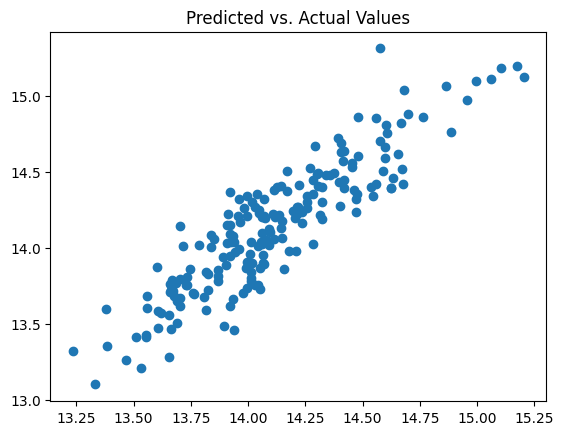

indeed, there is a rougly bell shaped curve to the redisual plot around 0 



In [148]:
#6:--------------------------------------------------------------------------------------------------
pn("Tis was completed in question 4. Teh R62 was about 0.8 and the RMSE was about 0.18. The predicted and true values do line up in an identifiable generally diagonal shape.")

pn("Here is it again")
runaregression(X_all_train, X_all_test, y_all_train, y_all_test)

pn("indeed, there is a rougly bell shaped curve to the redisual plot around 0")


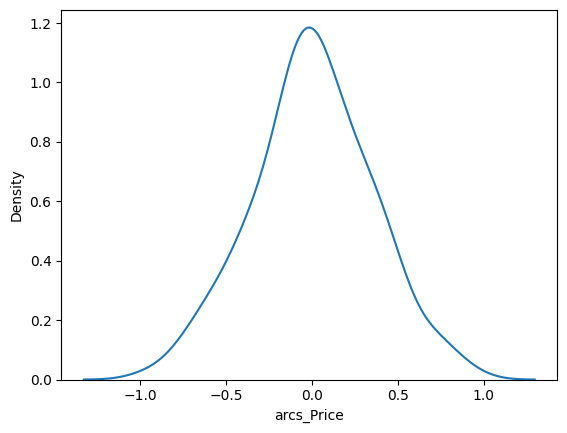

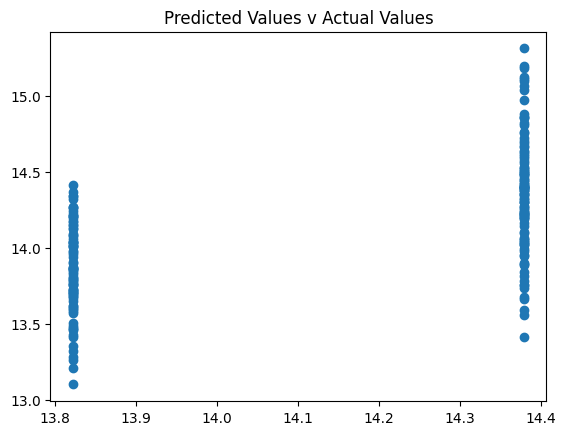

MSE: 0.12067115027720185
RMSE: 0.3473775327755119
R2: 0.3401804643983378


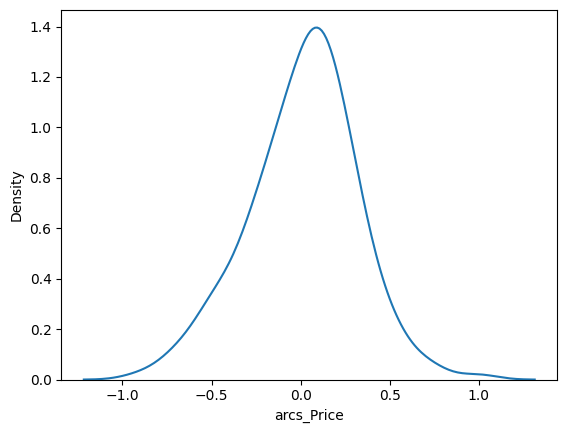

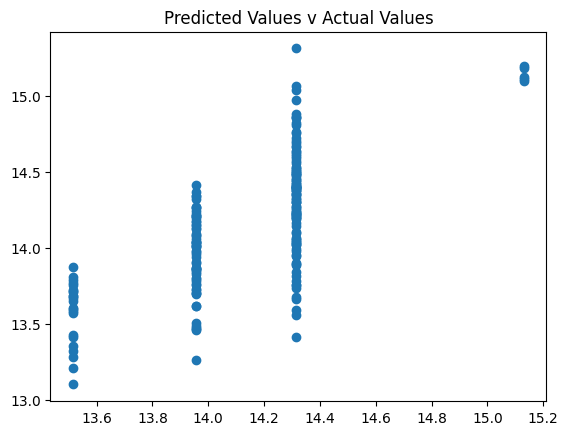

MSE: 0.09197311860972002
RMSE: 0.30327070186504995
R2: 0.49709884865191956


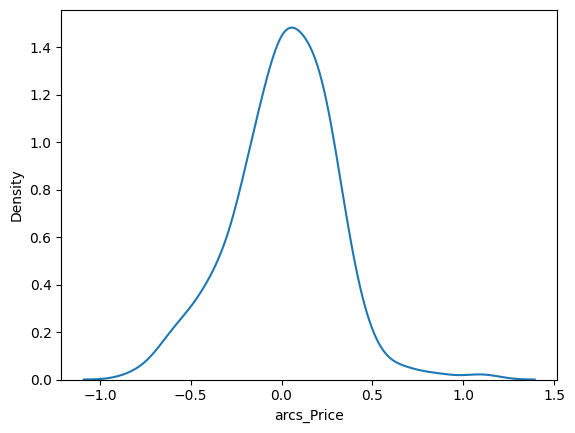

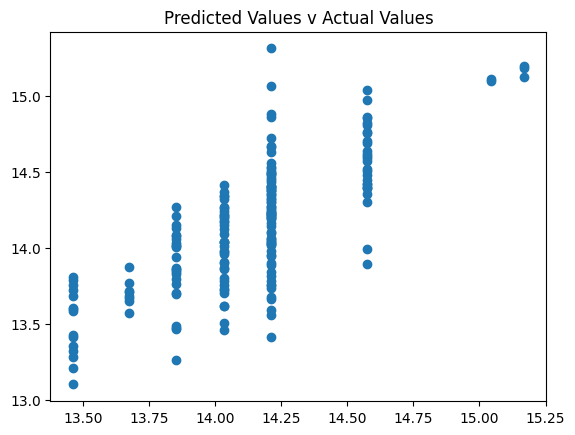

MSE: 0.07846245918344302
RMSE: 0.28011151205090273
R2: 0.5709739795994573


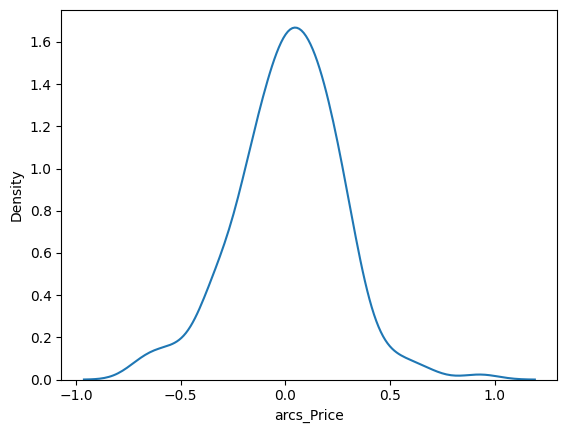

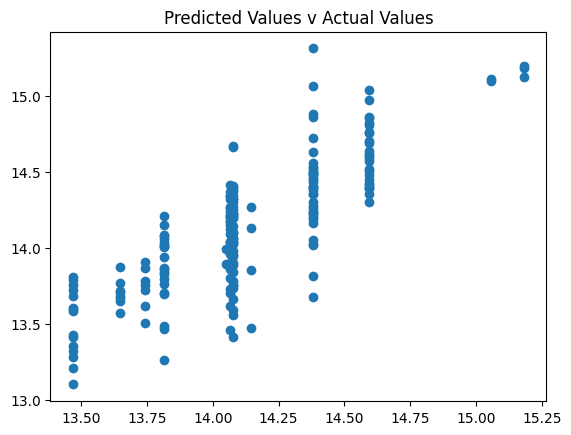

MSE: 0.06202723192093268
RMSE: 0.24905266896970343
R2: 0.6608403975042028


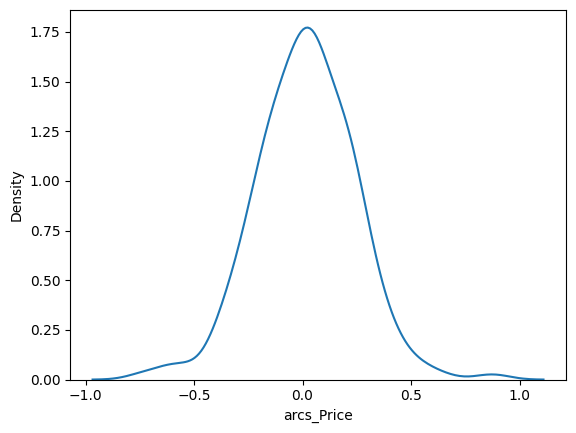

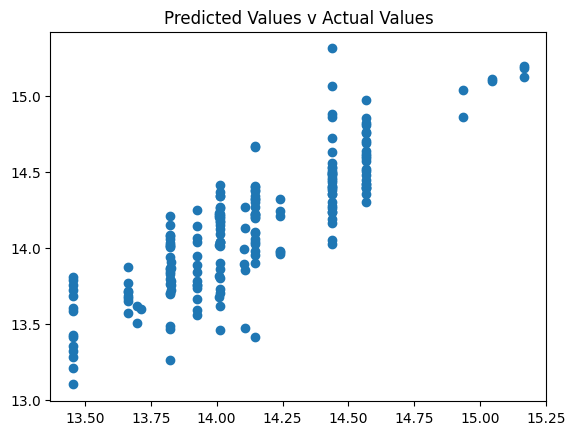

MSE: 0.05140982179971767
RMSE: 0.22673734099110732
R2: 0.7188954885460922


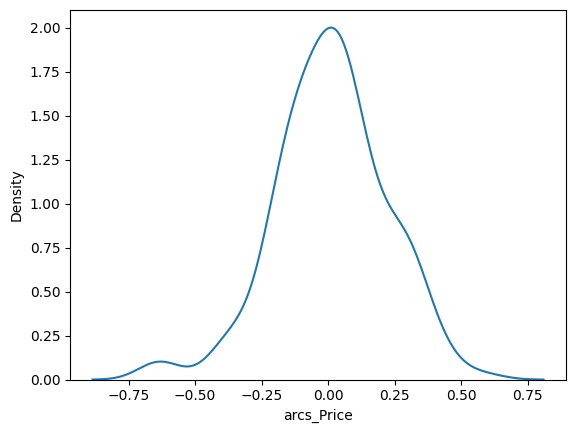

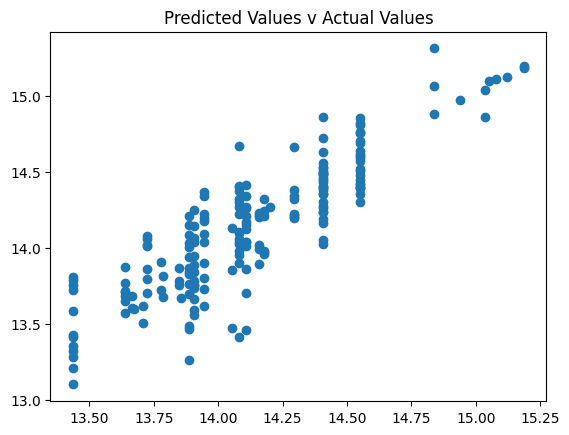

MSE: 0.043824633030396284
RMSE: 0.2093433376785521
R2: 0.7603706524086027


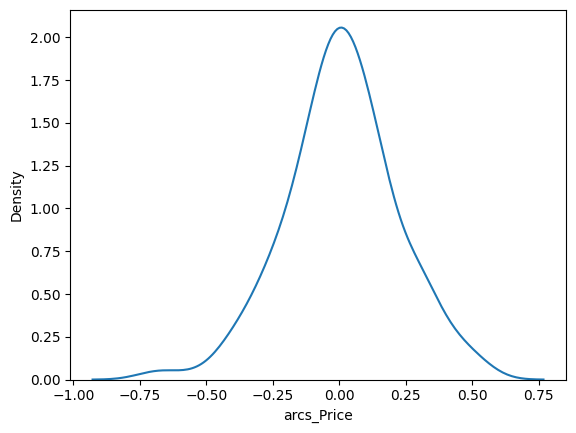

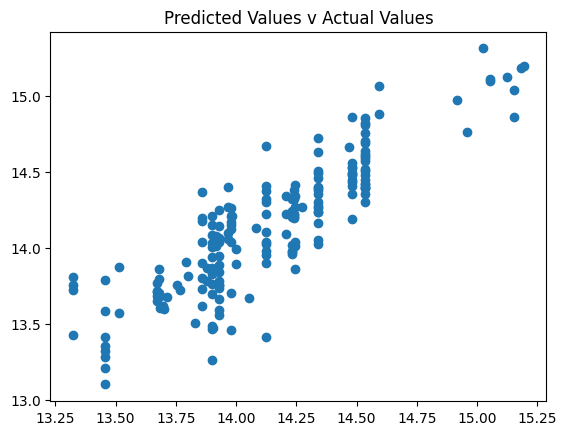

MSE: 0.044079922505840884
RMSE: 0.20995219100033438
R2: 0.7589747513772054


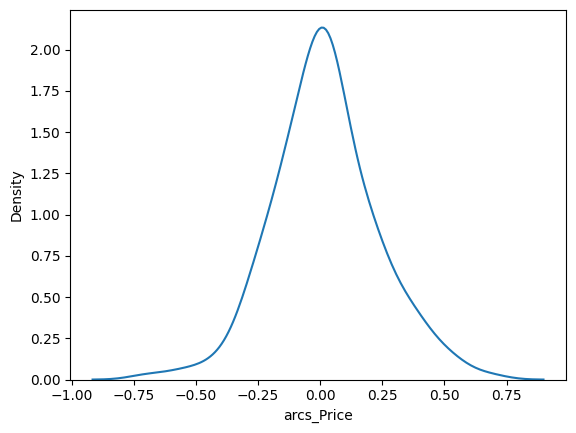

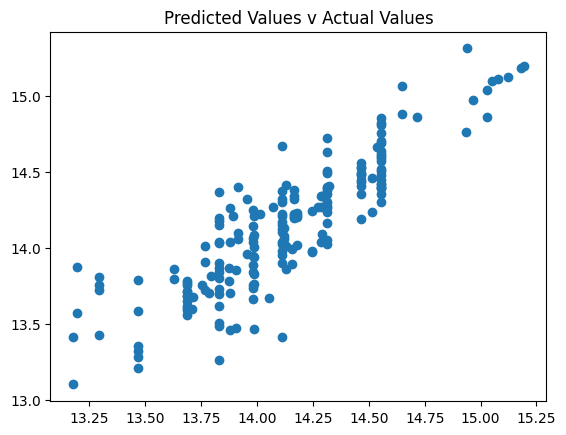

MSE: 0.04482184779076484
RMSE: 0.21171170914893875
R2: 0.7549179673337525


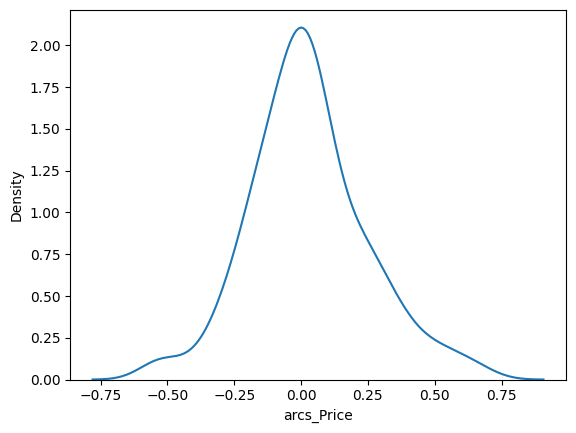

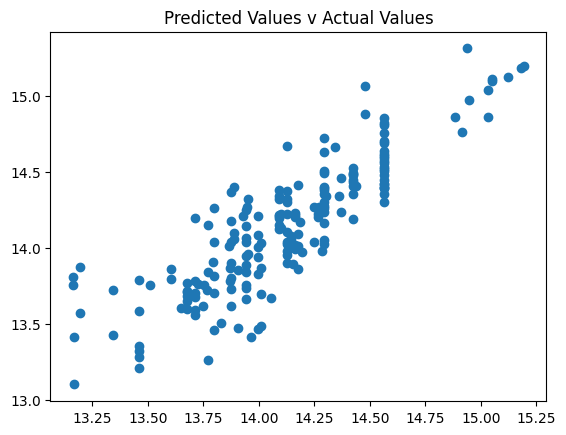

MSE: 0.04845262962241956
RMSE: 0.22011958027949163
R2: 0.7350651626117445


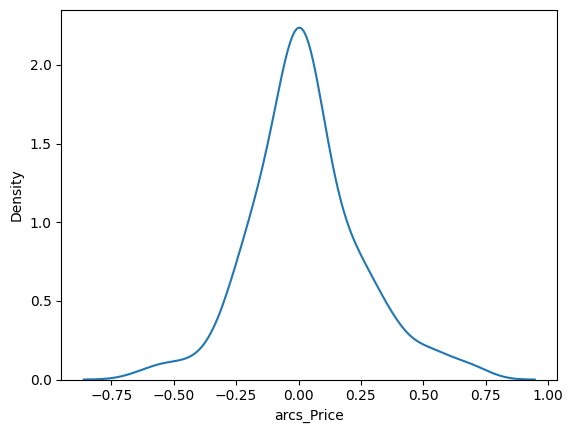

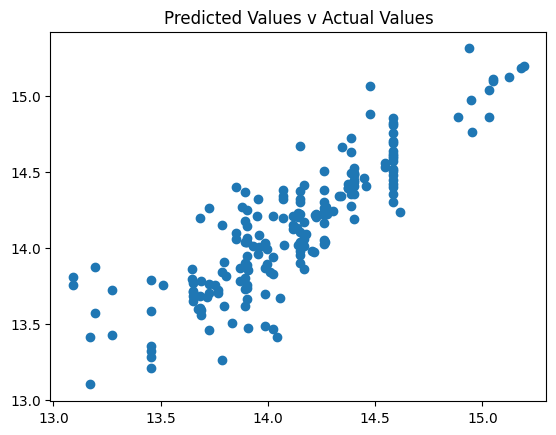

MSE: 0.04941481427447336
RMSE: 0.2222944314967727
R2: 0.7298040191750341
R2's:  [0.3401804643983378, 0.49709884865191956, 0.5709739795994573, 0.6608403975042028, 0.7188954885460922, 0.7603706524086027, 0.7589747513772054, 0.7549179673337525, 0.7350651626117445, 0.7298040191750341]
MSE's:  [0.12067115027720185, 0.09197311860972002, 0.07846245918344302, 0.06202723192093268, 0.05140982179971767, 0.043824633030396284, 0.044079922505840884, 0.04482184779076484, 0.04845262962241956, 0.04941481427447336]
Index of highest R^2:  5 ; VALUE:  0.7603706524086027
Index of lowest MSE:  5 ; VALUE:  0.043824633030396284
  

IF WE CALL THE ROOT 0, THEN THE TREE AT A DEPTH OF 5 IS THE BEST, SINCE IT HAS BOTH THE LOWEST MSE AND THE HIGHEST MSE 



In [149]:
from sys import breakpointhook
#7:----------------------------------------------------------------------------------------------------------------------------------------------
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
#base off given from question:
"""
 7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features,
 and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option
 (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set
  of a variety of depths. What depth tree gives the best results?
"""


max_depths = range(1,11)

r2_list = []
MSE_list = []


for max_depth in max_depths:
    model = tree.DecisionTreeRegressor(max_depth=max_depth, random_state=50) # Fit the classifier
    cart = model.fit(X_all_train, y_all_train)


## Make Predictions on the Test Set

    y_hat_cart = cart.predict(X_all_test)

    residuals_cart = y_all_test - y_hat_cart

    # Residual plot:
    sns.kdeplot(residuals_cart)
    plt.show()

    # True versus predicted plot:
    plt.scatter(x=y_hat_cart, y=y_all_test)
    plt.title('Predicted Values v Actual Values')
    plt.show()

    # Metrics
    MSE_cart = mean_squared_error(y_all_test, y_hat_cart)
    RMSE_cart = np.sqrt(MSE_cart)
    R2_cart = r2_score(y_all_test, y_hat_cart)

    r2_list.append(R2_cart)
    MSE_list.append(MSE_cart)


    print("MSE:", MSE_cart)
    print("RMSE:", RMSE_cart)
    print("R2:", R2_cart)


r2_array = np.array(r2_list)
MSE_array = np.array(MSE_list)
print("R2's: ", r2_list)
print("MSE's: ", MSE_list)

print("Index of highest R^2: ", np.argmax(r2_array), "; VALUE: ", r2_array.max())
print("Index of lowest MSE: ", np.argmin(MSE_array), "; VALUE: ", MSE_array.min())
pn(" ")
pn("IF WE CALL THE ROOT 0, THEN THE TREE AT A DEPTH OF 5 IS THE BEST, SINCE IT HAS BOTH THE LOWEST MSE AND THE HIGHEST MSE")


In [150]:
#8:----------------------------------------------------------------------------------------------
print("THIS IS IN THE CODE FOR 7. DEPTH = 5 WAS THE BEST TREE, ALTHOUGH I DID NOT EXPECT THIS.")
print("the predicted values indeed line up into a diagonal with a kernal density plot that is bell shaped around arcs = 0")

THIS IS IN THE CODE FOR 7. DEPTH = 5 WAS THE BEST TREE, ALTHOUGH I DID NOT EXPECT THIS.
the predicted values indeed line up into a diagonal with a kernal density plot that is bell shaped around arcs = 0


Here is it again 

-132.78064690045744 

[ 0.07232041  0.15716436  0.01351321 -0.30167094 -0.4483528  -0.10147391
  0.06238795  0.05818895  0.29614291  0.38654212  0.42808977 -0.17202591
 -0.04013472 -0.13174022 -0.20061033  0.02553547 -0.01580078  0.14336547
  0.01155696 -0.08669239  0.00361994  0.04705498 -0.03363057  0.04475312
  0.11366451  0.04263772 -0.01787844  0.05267125  0.06796321 -0.27421375
  0.00134674 -0.00303491  0.00814559  0.03359299  0.0255832  -0.1483004
 -0.26745247  0.14268222  0.24748745  0.15077237 -0.05221425 -0.09855811
 -0.15901157 -0.05683102  0.04929136  0.13955919  0.02699203  0.04374692
 -0.04374692  0.12011461  0.06891866 -0.18903327] 

R^2: 0.8057548775146425 

RMSE: 0.18847953542127216 

MSEL 0.03552453527261858 



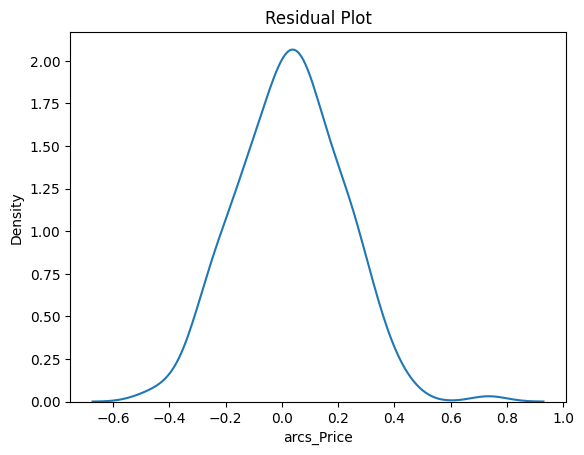

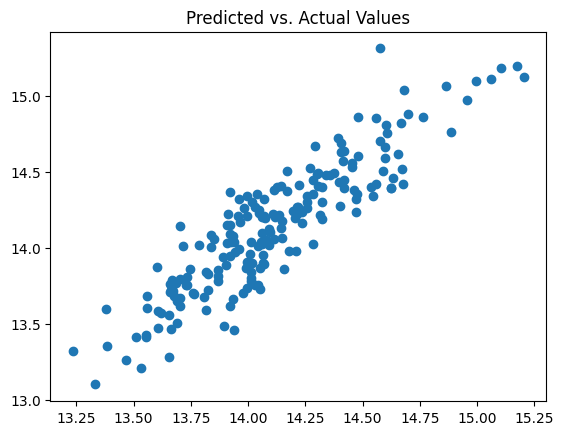

The MSE of the linear model is lower, and the r^2 is higher, than those same statistics from
the best of the trees. This, we prefer the linear model.
The classification was certainly the worse set based on the results, both due to complexity
and poor (crazy high) statistical values, which indicated overfitting However, I feel I may have messed this code up.


In [151]:
#9:----------------------------------------------------------------------------------------------

#LINEAR MODEL:
pn("Here is it again")
runaregression(X_all_train, X_all_test, y_all_train, y_all_test)

print("The MSE of the linear model is lower, and the r^2 is higher, than those same statistics from")
print("the best of the trees. This, we prefer the linear model.")
print("The classification was certainly the worse set based on the results, both due to complexity")
print("and poor (crazy high) statistical values, which indicated overfitting However, I feel I may have messed this code up.")

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [152]:
#1:---------------------------------------------------------

cmc = pd.read_csv("assignment4/data/contraception_hw.csv")
#cmc.head()
pn(cmc.columns)

print(cmc["method"].value_counts(0))

method_vs_nChildren = pd.crosstab(cmc["method"], cmc["numberChildren"])
pn(method_vs_nChildren)

print("It appears that couples who use contraception, have around as many children as those who")
print("Either one or the other type. However, the counts here aren't equal so further ratios and stats should be computed")


avg_children_count = cmc.groupby("method")["numberChildren"].mean() #gets the avg number of children, better for us to see
print(avg_children_count)
print("Based of the averages, it appears that individuals who don't use conttaception tend to have the fewest number of children")

Index(['Unnamed: 0', 'age', 'edu', 'edu_spouse', 'numberChildren', 'religion',
       'working', 'spouse_occupation', 'standardOfLivingIndex',
       'mediaExposure', 'method'],
      dtype='object') 

1    629
3    511
2    333
Name: method, dtype: int64
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1 

It appears that couples who use contraception, have around as many children as those who
Either one or the other type. However, the counts here aren't equal so further ratios and stats should be computed
method
1    2.934817
2    3.738739
3    3.352250
Name: numberChildren, dtype: float64
Based of the averages, it appears that individuals who don't u

In [153]:
#2:-----------------------------------------------------------------------

#we'll call method our y, based off of 3

y = cmc["method"] #dependent
X = cmc.drop("method",  axis = 1) #drop this columns. the "unnamed: 0" which
                                  #I think is just numbering the rows, but the tree wasn't working when I dropped it?

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


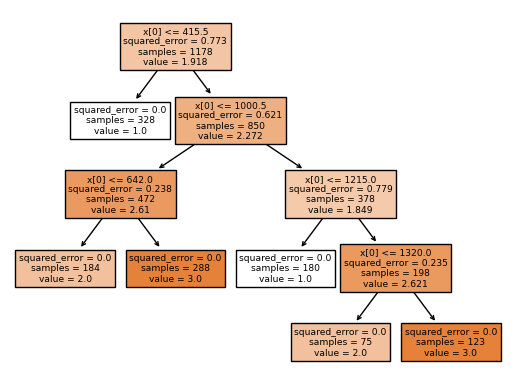

The terminal nodes take on float values which shouldn't be the case for categories, 1, 2, and 3. 

Regression trees like this make predictions that are continuous values, which isn't suitable for use when we are trying to predict categories 



In [154]:
#3:-----------------------------------------------------------------------------------------

model = tree.DecisionTreeRegressor() #again, not a classifier here
cart = model.fit(X_train, y_train)
tree.plot_tree(cart, filled = True)

plt.show()

pn("The terminal nodes take on float values which shouldn't be the case for categories, 1, 2, and 3.")
pn("Regression trees like this make predictions that are continuous values, which isn't suitable for use when we are trying to predict categories")


0       24
1       45
2       43
3       42
4       36
        ..
1468    33
1469    33
1470    39
1471    33
1472    17
Name: age, Length: 1473, dtype: int64
Index(['Unnamed: 0', 'age', 'edu', 'edu_spouse', 'numberChildren', 'religion',
       'working', 'spouse_occupation', 'standardOfLivingIndex',
       'mediaExposure', 'method'],
      dtype='object')
[1 3 3 2 1 3 2 2 1 3 1 2 1 1 2 1 2 3 2 2 1 2 1 2 2 2 3 2 2 3 1 1 1 1 3 1 2
 1 3 1 1 2 1 3 2 3 2 3 3 3 3 1 1 3 1 3 3 1 2 3 2 1 1 1 2 3 1 1 2 2 1 3 1 3
 1 1 1 2 2 3 1 1 1 1 3 1 3 2 1 1 1 1 1 3 3 1 1 1 1 3 3 2 3 2 2 1 3 2 2 3 1
 3 3 1 1 3 1 3 3 1 1 3 3 2 2 3 3 3 1 2 1 1 3 1 2 3 3 3 1 3 2 1 1 3 1 1 1 3
 2 1 2 2 3 1 3 3 1 2 2 3 3 2 3 1 3 1 1 3 1 1 1 3 1 1 1 1 1 3 3 2 1 3 1 2 1
 2 3 2 3 1 1 3 2 3 2 3 2 3 1 3 3 3 1 1 2 2 1 2 1 3 3 2 1 1 3 3 2 1 3 1 1 1
 3 1 3 3 1 3 3 2 2 1 1 1 3 1 3 2 2 2 3 1 1 2 2 3 1 3 1 1 1 2 1 2 1 1 2 1 2
 3 3 3 3 2 1 2 1 1 3 1 3 1 2 1 2 3 1 3 3 1 1 3 3 2 2 3 1 1 3 3 2 2 3 1 1]
So, it looks like the variable with the lo

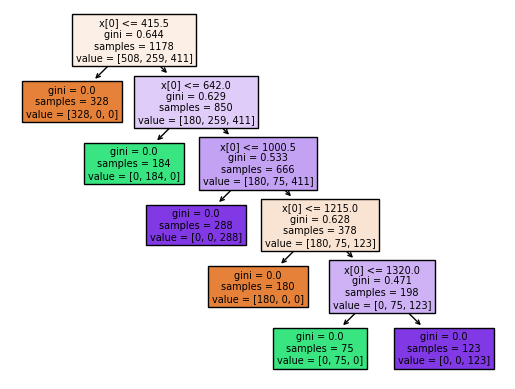

In [155]:
#4:----------------------------------------------------------------------------------------------

print(cmc["age"])

print(cmc.columns)

model = tree.DecisionTreeClassifier() # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart, filled = True)
estimated_y = cart.predict(X_test)
print(estimated_y)
pn("So, it looks like the variable with the lowest overall gini which was chosen was x[0]")

In [156]:
#5-----------------------------------------------------------------------------------------------


tab = pd.crosstab(y_test, estimated_y, rownames=['Actual'], colnames=['Predicted'])

# This now sums all the diagonal elements for a 3x3 matrix and divides by the total number of instances
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,estimated_y)


#I COULD NOT FIGURE OUT HOW TO DO THE FOLLOWING:
#the following is from chat gpt. I was having trouble figuring out how to sum the true values (the diagonals (1,1), (2,2), (3,3) and divide that by the totlal number of instances

class_accuracies = {tab.index[i]: tab.iloc[i,i] / tab.iloc[i].sum() for i in range(len(tab))}

print("Accuracy for Method 1 : ", "")
print('Confusion Matrix:')
print(tab)
print('\nOverall Accuracy: {:.2f}'.format(acc))
print('\nClass Accuracies:')
for class_label, accuracy in class_accuracies.items():
    print(f'Accuracy for class {class_label}: {accuracy:.2f}')


Accuracy:  0.9948717948717949 

Accuracy for Method 1 :  
Confusion Matrix:
Predicted    1   2    3
Actual                 
1          121   0    0
2            1  73    0
3            0   0  100

Overall Accuracy: 0.99

Class Accuracies:
Accuracy for class 1: 1.00
Accuracy for class 2: 0.99
Accuracy for class 3: 1.00


In [157]:
#6---------------------------------------------------------------------------------------
pn("If the target outcome is not bianry, which is true for our categorical variable, method")
print("with three possible values, we may predict probabilities greater than 1 or less than zero.")

If the target outcome is not bianry, which is true for our categorical variable, method 

with three possible values, we may predict probabilities greater than 1 or less than zero.


**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?